## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 3x^2 + 4x - 9 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.random.uniform(-100, 100, 10000)
y = 3 * x**2 + 4 * x - 9

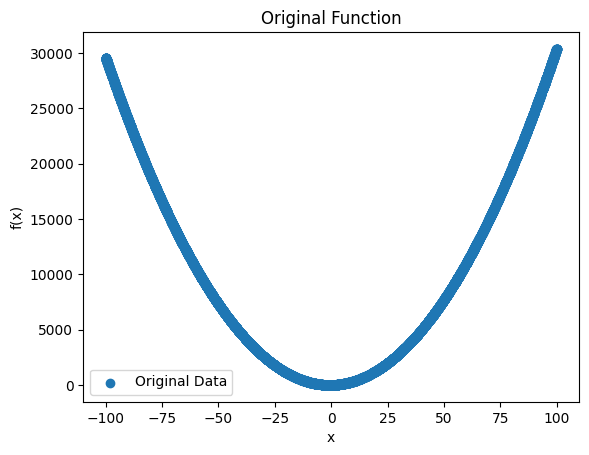

In [4]:
# Step 2: Plot the Original Function
plt.scatter(x, y, label='Original Data')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function')
plt.legend()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))

In [6]:
# Compile the model
model.compile(loss='mean_squared_error' , optimizer='adam')

# Train the model
history = model.fit(x, y, epochs=100, batch_size=32)

Epoch 1/100
313/313 [==============================] - 7s 3ms/step - loss: 176357136.0000
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 55864120.0000
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 11742151.0000
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 11565534.0000
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 11421846.0000
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 11284568.0000
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 11130761.0000
Epoch 8/100
313/313 [==============================] - 1s 5ms/step - loss: 10988096.0000
Epoch 9/100
313/313 [==============================] - 1s 4ms/step - loss: 10841267.0000
Epoch 10/100
313/313 [==============================] - 1s 3ms/step - loss: 10680549.0000
Epoch 11/100
313/313 [==============================] - 1s 3ms/step - loss: 10524749.0000
Epoch 12/100
313/3

In [7]:
# Generate test data
x_test = np.random.uniform(-100, 100, 1000)
y_test = 3 * x_test**2 + 4 * x_test - 9

# Predict using the model
y_pred = model.predict(x_test)

# Calculate test accuracy using MSE
test_mse = np.mean((y_test - y_pred.reshape(-1))**2)
print(f"Test Mean Squared Error: {test_mse}")

32/32 [==============================] - 0s 2ms/step
Test Mean Squared Error: 4351.713006906908


In [8]:
test_loss = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)

32/32 [==============================] - 0s 2ms/step - loss: 4351.7124
Test loss: 4351.71240234375


In [9]:
from sklearn.metrics import r2_score

# Predict using the model
y_pred = model.predict(x_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared (test accuracy): {r2:.4f}")

32/32 [==============================] - 0s 3ms/step
R-squared (test accuracy): 0.9999


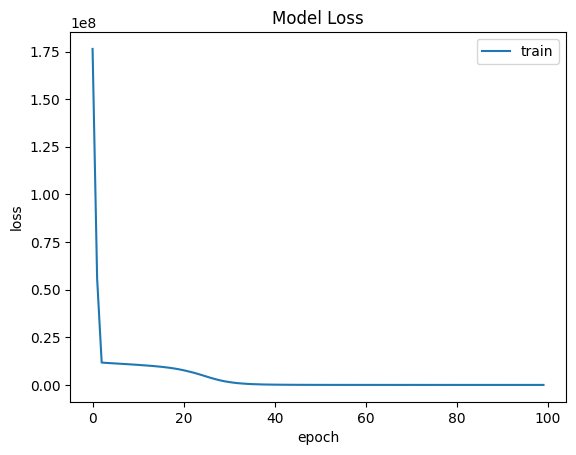

In [10]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [41]:
import torch
import torch.nn as nn
import numpy as np


import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [42]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [43]:
# Define regularization and optimization configurations
regularization_configs = [None, nn.Dropout(0.2)]
optimizers = [optim.RMSprop, optim.Adam]

### Defining the network

In [49]:
# Neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

### Loading the datasets

<i>
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [50]:
train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True,
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, shuffle=True)

In [51]:
test_dataset = torchvision.datasets.MNIST(root='data',
                                           train=False,
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size, shuffle=True)

##### Display samples

4


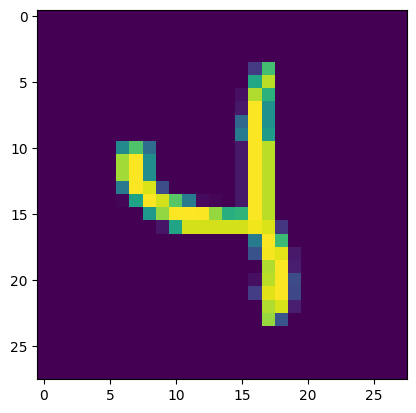

In [52]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())

    plt.imshow(images[0].reshape((28,28)))
    break

In [71]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Train the model

In [73]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

# Reconfigure the images into a 1D vector (actually, (X,1) tensor)
        images = images.reshape(-1, 28*28)
        labels = labels

# Forward pass
### Compute the output and loss
        outputs = model(images)
        loss = criterion(outputs, labels)

# Backward and optimize
# display the progress
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3664
Epoch [1/5], Step [200/600], Loss: 0.2426
Epoch [1/5], Step [300/600], Loss: 0.1476
Epoch [1/5], Step [400/600], Loss: 0.2043
Epoch [1/5], Step [500/600], Loss: 0.1531
Epoch [1/5], Step [600/600], Loss: 0.1243
Epoch [2/5], Step [100/600], Loss: 0.1606
Epoch [2/5], Step [200/600], Loss: 0.1296
Epoch [2/5], Step [300/600], Loss: 0.0825
Epoch [2/5], Step [400/600], Loss: 0.1390
Epoch [2/5], Step [500/600], Loss: 0.0823
Epoch [2/5], Step [600/600], Loss: 0.1141
Epoch [3/5], Step [100/600], Loss: 0.0795
Epoch [3/5], Step [200/600], Loss: 0.0384
Epoch [3/5], Step [300/600], Loss: 0.1280
Epoch [3/5], Step [400/600], Loss: 0.0304
Epoch [3/5], Step [500/600], Loss: 0.0848
Epoch [3/5], Step [600/600], Loss: 0.1435
Epoch [4/5], Step [100/600], Loss: 0.1243
Epoch [4/5], Step [200/600], Loss: 0.0842
Epoch [4/5], Step [300/600], Loss: 0.0411
Epoch [4/5], Step [400/600], Loss: 0.0913
Epoch [4/5], Step [500/600], Loss: 0.0493
Epoch [4/5], Step [600/600], Loss:

## Taking 4 samples from the test set

display the image
print the true label
print the output probability distribution
print the predicted class

In [74]:
# Taking 4 samples from the test set
samples = []
for i, (images, labels) in enumerate(test_loader):
    samples.append((images[0], labels[0]))
    if i == 3:
        break

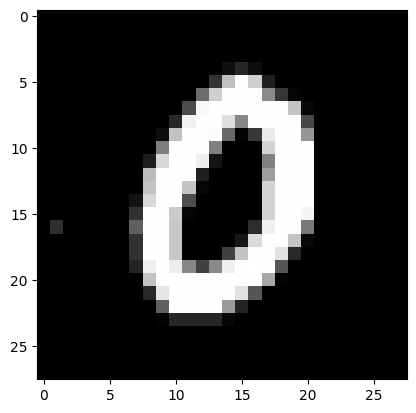

True label: tensor(0)
Predicted class: tensor(0)
Output probability distribution: tensor([9.9992e-01, 8.8890e-11, 4.4986e-05, 3.3528e-09, 5.2223e-06, 2.0349e-08,
        3.7525e-07, 1.1135e-05, 2.5648e-07, 2.2473e-05])


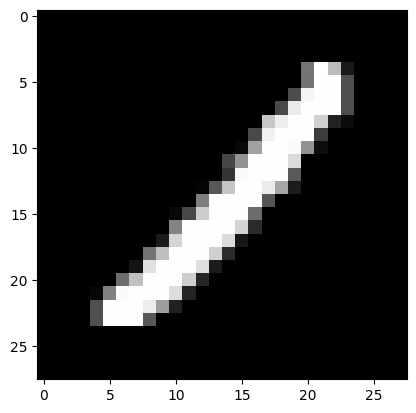

True label: tensor(1)
Predicted class: tensor(1)
Output probability distribution: tensor([1.7338e-10, 9.9941e-01, 6.6296e-06, 1.7886e-06, 3.5014e-05, 3.1450e-09,
        2.2458e-10, 5.4551e-04, 4.2488e-06, 4.8444e-10])


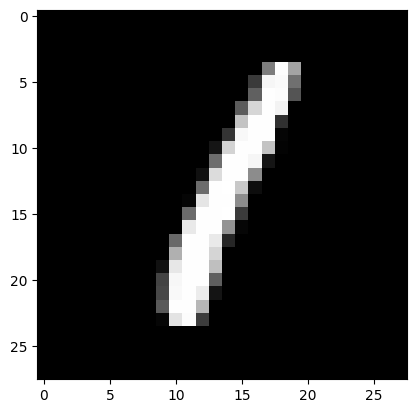

True label: tensor(1)
Predicted class: tensor(1)
Output probability distribution: tensor([5.6214e-07, 9.9996e-01, 6.9731e-06, 5.2991e-08, 2.5452e-06, 6.9817e-07,
        1.5993e-06, 1.0686e-05, 1.8829e-05, 5.3260e-09])


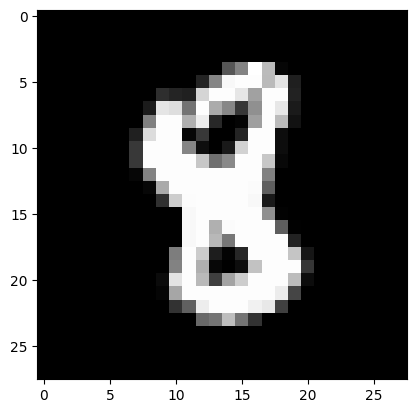

True label: tensor(8)
Predicted class: tensor(8)
Output probability distribution: tensor([1.4273e-06, 9.8463e-08, 5.0788e-06, 2.0884e-05, 2.9955e-06, 2.5999e-05,
        2.0319e-05, 4.8973e-09, 9.9992e-01, 5.0959e-06])


In [75]:
import torch.nn.functional as F

model.eval()

dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.view(images.size(0), -1)

with torch.no_grad():
    outputs = model(images)

_, predicted = torch.max(outputs.data, 1)

for i in range(4):
    image = images[i].view(28, 28)
    label = labels[i]
    predicted_class = predicted[i]
    probs = F.softmax(outputs.data[i], dim=0)

    plt.imshow(image, cmap='gray')
    plt.show()
    print("True label:", label)
    print("Predicted class:", predicted_class)
    print("Output probability distribution:", probs)

## Trying Different Hyperparameters

In [81]:
import pandas as pd
import torch.optim as optim


# Define a function to create and train neural network
def create_and_train_model(hidden_units, l2_regularization, dropout_rate, optimizer_type, learning_rate):
    # Define and initialize model with the given hyperparameters
    model = NeuralNet(input_size, hidden_units, num_classes)
    model = model.to(device)

    # Define optimizer
    if optimizer_type == 'RMSProp':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=l2_regularization)
    elif optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_regularization)
    else:
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_regularization)

    # Lists to store training metrics for each epoch
    training_loss_list = []

    # Train the model and collect performance metrics
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_training_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):

            # Move the data to the GPU
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images.view(-1, 784))
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_training_loss += loss.item()

        # Calculate and append training loss for this epoch
        training_loss = running_training_loss / len(train_loader)
        training_loss_list.append(training_loss)

    # After all epochs, evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images.view(-1, 784))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and return accuracy on the test set
    accuracy = 100 * correct / total
    return training_loss_list, accuracy

In [78]:
# Check if a GPU is available and select it; otherwise, use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a list of hyperparameters to experiment with
hyperparameter_combinations = [
    (100, 0.001, 0.2, 'RMSProp', 0.001),
    (200, 0.01, 0.3, 'Adam', 0.01)
]


Using device: cuda:0


In [79]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Hidden Units', 'L2 Regularization', 'Dropout Rate', 'Optimizer', 'Learning Rate', 'Training Loss', 'Accuracy'])

In [80]:
# Iterate through hyperparameter combinations and collect results
for combo in hyperparameter_combinations:
    hidden_units, l2_regularization, dropout_rate, optimizer_type, learning_rate = combo
    training_loss, accuracy = create_and_train_model(hidden_units, l2_regularization, dropout_rate, optimizer_type, learning_rate)

    # Append results to the DataFrame
    results_df = results_df.append({'Hidden Units': hidden_units,
                                    'L2 Regularization': l2_regularization,
                                    'Dropout Rate': dropout_rate,
                                    'Optimizer': optimizer_type,
                                    'Learning Rate': learning_rate,
                                    'Training Loss': training_loss[-1],  # Get final training loss
                                    'Accuracy': accuracy}, ignore_index=True)

# Display the tabulated results
results_df

<ipython-input-80-dafda5db9bd1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Hidden Units': hidden_units,
<ipython-input-80-dafda5db9bd1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Hidden Units': hidden_units,


,Hidden Units,L2 Regularization,Dropout Rate,Optimizer,Learning Rate,Training Loss,Accuracy
0,100,0.001,0.2,RMSProp,0.001,0.118272,96.63
1,200,0.010,0.3,Adam,0.010,0.323229,91.22
